In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
genres = ['Action', 'Comedy', 'Drama', 'Sci-Fi', 'Romance']
true_rewards = [0.6, 0.7, 0.5, 0.4, 0.3]


In [3]:
class Bandit:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.rewards = np.zeros(num_arms)
        self.pulls = np.zeros(num_arms)

    def pull(self, arm):
        reward = np.random.normal(true_rewards[arm], 0.1, 1)
        self.rewards[arm] += reward
        self.pulls[arm] += 1
        return reward

    def best_arm(self):
        return np.argmax(self.rewards / (self.pulls + 1e-5))

In [4]:
def epsilon_greedy(bandit, epsilon, num_iterations):
    reward_history = []
    estimated_values = np.zeros(bandit.num_arms)

    for i in range(num_iterations):
        if np.random.rand() < epsilon:
            arm = np.random.randint(bandit.num_arms)
        else:
            arm = bandit.best_arm()

        reward = bandit.pull(arm)
        reward_history.append(reward)
        estimated_values[arm] = (estimated_values[arm] * (i - 1) + reward) / i

    return reward_history, estimated_values, bandit.pulls

In [5]:
def plot_results(reward_history, arm_selections, estimated_values):
    
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(np.cumsum(reward_history))
    plt.title('Cumulative Reward')
    plt.xlabel('Iteration')
    plt.ylabel('Cumulative Reward')

    plt.subplot(2, 2, 2)
    plt.plot(np.array(reward_history).cumsum() / np.arange(1, num_iterations + 1))
    plt.title('Average Reward')
    plt.xlabel('Iteration')
    plt.ylabel('Average Reward')

    plt.subplot(2, 2, 3)
    plt.bar(range(len(genres)), arm_selections)
    plt.title('Arm Selection Frequency')
    plt.xlabel('Arm (Genre)')
    plt.ylabel('Number of Selections')
    plt.xticks(range(len(genres)), genres, rotation=45)

    plt.subplot(2, 2, 4)
    plt.bar(range(len(genres)), estimated_values)
    plt.title('Estimated Value of Each Arm (Genre)')
    plt.xlabel('Arm (Genre)')
    plt.ylabel('Estimated Value')
    plt.xticks(range(len(genres)), genres, rotation=45)

    plt.tight_layout()
    plt.show()

## Low Epsilon Value

C:\Users\manav\AppData\Local\Temp\ipykernel_33572\1036174132.py:13: RuntimeWarning: divide by zero encountered in divide
  estimated_values[arm] = (estimated_values[arm] * (i - 1) + reward) / i
C:\Users\manav\AppData\Local\Temp\ipykernel_33572\1036174132.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  estimated_values[arm] = (estimated_values[arm] * (i - 1) + reward) / i


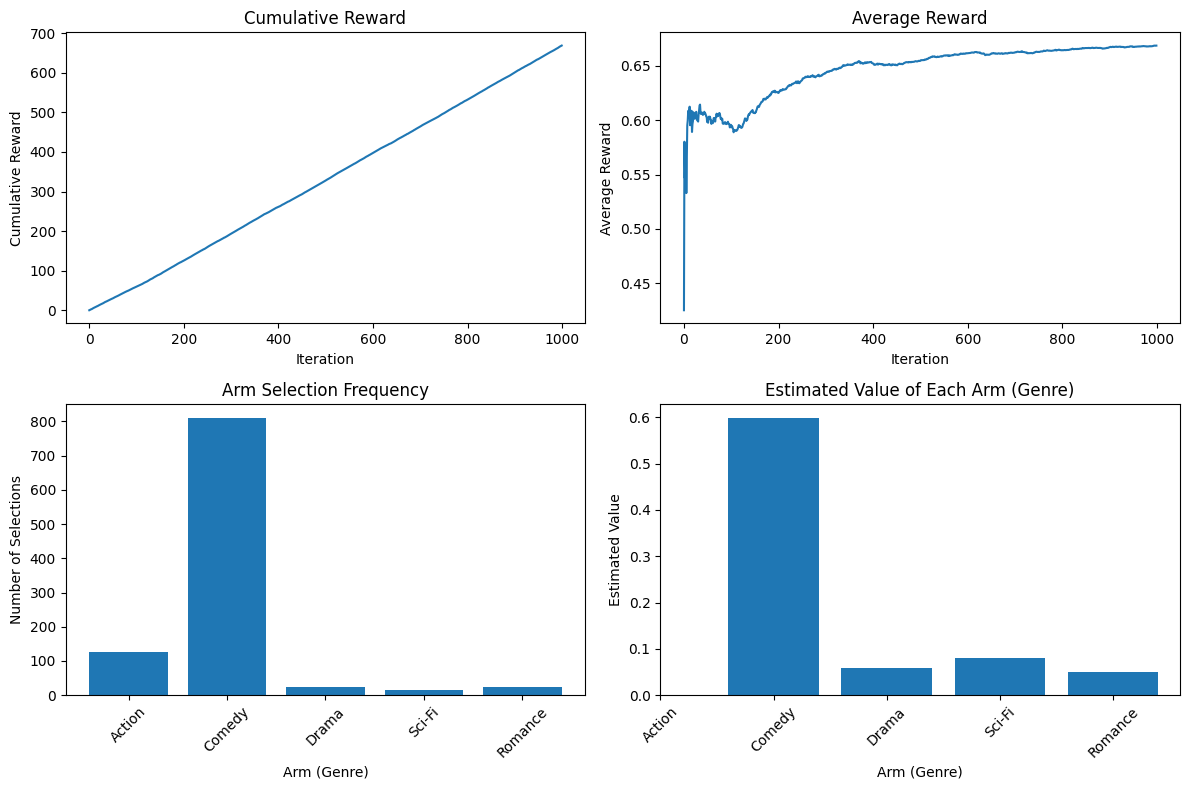

In [6]:
num_iterations = 1000
bandit = Bandit(len(genres))
reward_history, estimated_values, arm_selections = epsilon_greedy(bandit, epsilon=0.1, num_iterations=num_iterations)
plot_results(reward_history, arm_selections, estimated_values)

## Medium Epsilon Value

C:\Users\manav\AppData\Local\Temp\ipykernel_33572\1036174132.py:13: RuntimeWarning: divide by zero encountered in divide
  estimated_values[arm] = (estimated_values[arm] * (i - 1) + reward) / i
C:\Users\manav\AppData\Local\Temp\ipykernel_33572\1036174132.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  estimated_values[arm] = (estimated_values[arm] * (i - 1) + reward) / i


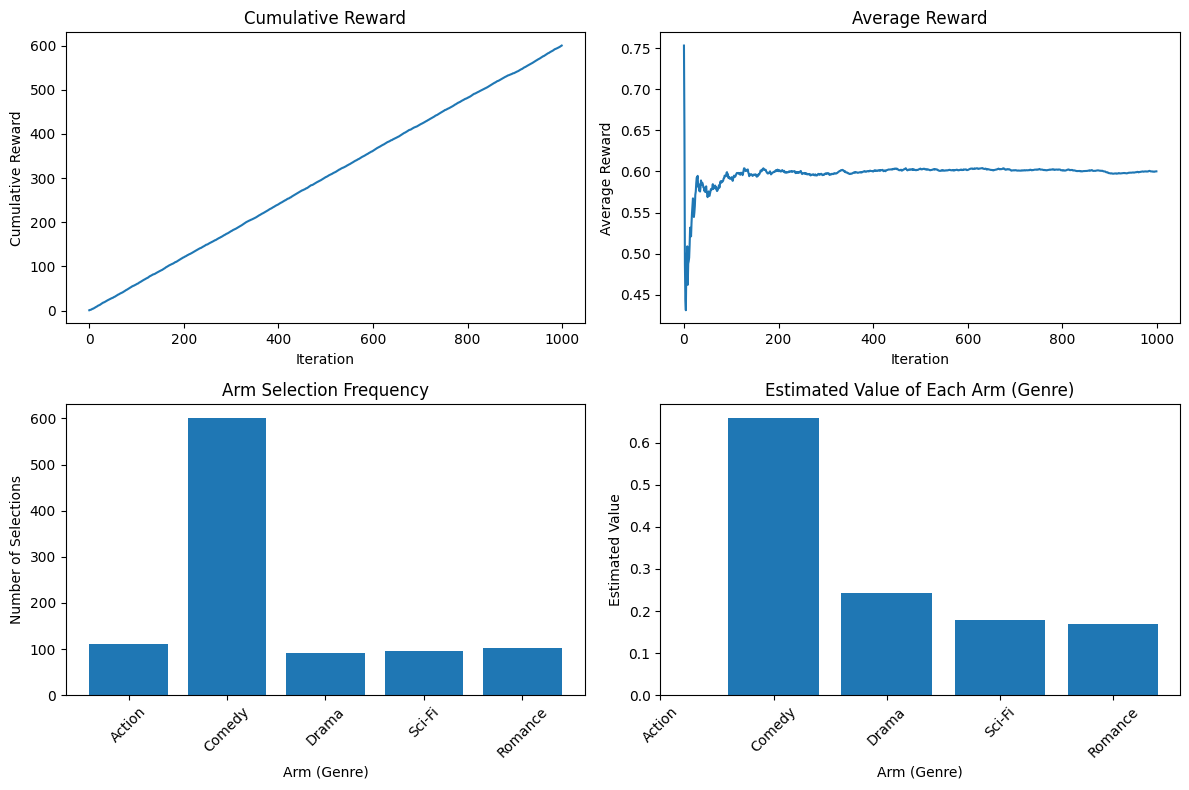

In [7]:
num_iterations = 1000
bandit = Bandit(len(genres))
reward_history, estimated_values, arm_selections = epsilon_greedy(bandit, epsilon=0.5, num_iterations=num_iterations)
plot_results(reward_history, arm_selections, estimated_values)

## High Epsilon Value

C:\Users\manav\AppData\Local\Temp\ipykernel_33572\1036174132.py:13: RuntimeWarning: divide by zero encountered in divide
  estimated_values[arm] = (estimated_values[arm] * (i - 1) + reward) / i
C:\Users\manav\AppData\Local\Temp\ipykernel_33572\1036174132.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  estimated_values[arm] = (estimated_values[arm] * (i - 1) + reward) / i


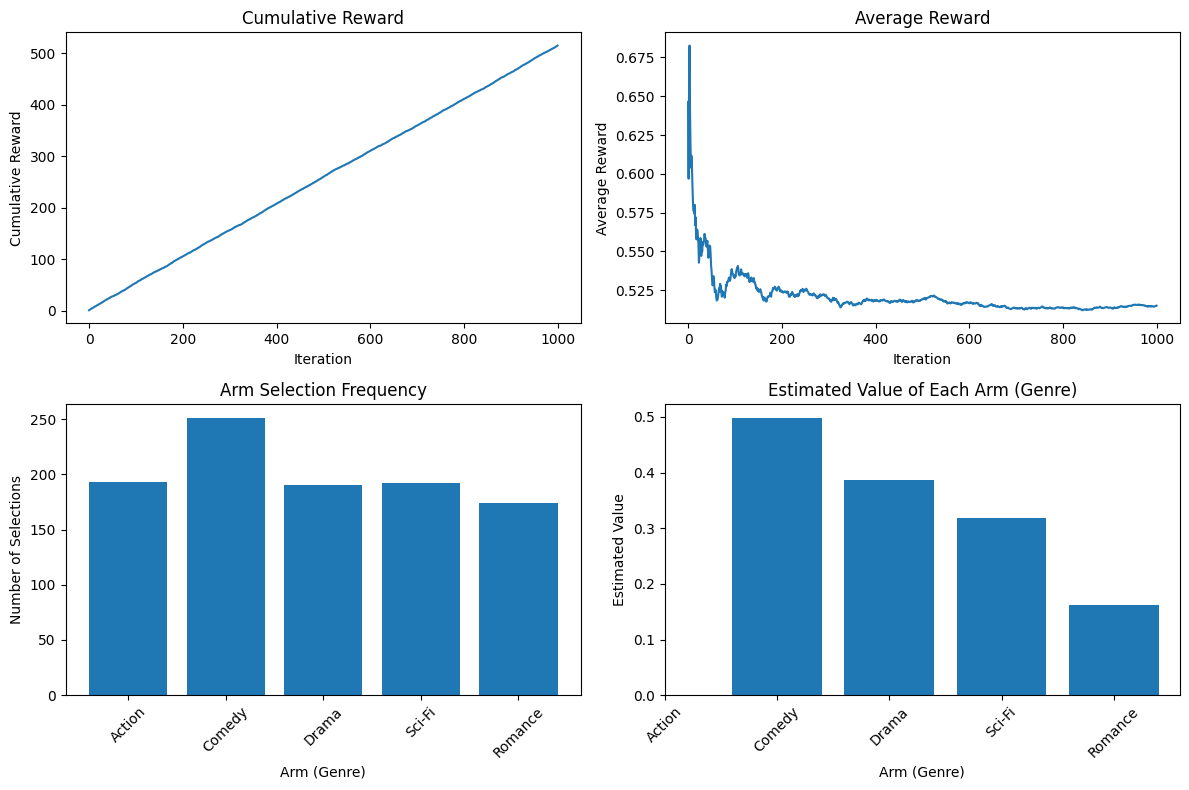

In [9]:
num_iterations = 1000
bandit = Bandit(len(genres))
reward_history, estimated_values, arm_selections = epsilon_greedy(bandit, epsilon=0.9, num_iterations=num_iterations)
plot_results(reward_history, arm_selections, estimated_values)